In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Import Dataset 

In [4]:
train_df = pd.read_csv('https://raw.githubusercontent.com/Zyttik-m/Harmful-Brain-Classification/refs/heads/main/data/train.csv')
test_df = pd.read_csv('https://raw.githubusercontent.com/Zyttik-m/Harmful-Brain-Classification/refs/heads/main/data/test.csv')
sample_submission_df = pd.read_csv('https://raw.githubusercontent.com/Zyttik-m/Harmful-Brain-Classification/refs/heads/main/data/sample_submission.csv')

In [5]:
train_df

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106795,351917269,6,12.0,2147388374,6,12.0,4195677307,10351,LRDA,0,0,0,3,0,0
106796,351917269,7,14.0,2147388374,7,14.0,290896675,10351,LRDA,0,0,0,3,0,0
106797,351917269,8,16.0,2147388374,8,16.0,461435451,10351,LRDA,0,0,0,3,0,0
106798,351917269,9,18.0,2147388374,9,18.0,3786213131,10351,LRDA,0,0,0,3,0,0


In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

# Exploring Data

In [7]:
train_df["expert_consensus"].value_counts()

expert_consensus
Seizure    20933
GRDA       18861
Other      18808
GPD        16702
LRDA       16640
LPD        14856
Name: count, dtype: int64

In [20]:
seizure_df = train_df[train_df["expert_consensus"] == "Seizure"][["eeg_id","spectrogram_id"]]

In [32]:
seizure_df

,eeg_id,spectrogram_id
0,1628180742,353733
1,1628180742,353733
2,1628180742,353733
3,1628180742,353733
4,1628180742,353733
...,...,...
106771,3349371726,2146170054
106772,641615525,2146170054
106773,641615525,2146170054
106774,641615525,2146170054


### Create function for loading the spectrogram and eeg signal

In [35]:
eeg_folder = "/Users/kittithatchalermvisutkul/Documents/msc/FFM/Harmful Brain Classification/sample/train_eegs"

def load_data(eeg_id):
    eeg_file = os.path.join(eeg_folder, f"{eeg_id}.parquet")
    
    if os.path.exists(eeg_file):
        eeg_data = pd.read_parquet(eeg_file)
        return eeg_data
    else:
        return None


In [36]:
load_data(1628180742)

,Fp1,F3,C3,P3,F7,T3,T5,O1,Fz,Cz,Pz,Fp2,F4,C4,P4,F8,T4,T6,O2,EKG
0,-80.519997,-70.540001,-80.110001,-108.750000,-120.330002,-88.620003,-101.750000,-104.489998,-99.129997,-90.389999,-97.040001,-77.989998,-88.830002,-112.120003,-108.110001,-95.949997,-98.360001,-121.730003,-106.449997,7.920000
1,-80.449997,-70.330002,-81.760002,-107.669998,-120.769997,-90.820000,-104.260002,-99.730003,-99.070000,-92.290001,-96.019997,-84.500000,-84.989998,-115.610001,-103.860001,-97.470001,-89.290001,-115.500000,-102.059998,29.219999
2,-80.209999,-75.870003,-82.050003,-106.010002,-117.500000,-87.489998,-99.589996,-96.820000,-119.680000,-99.360001,-91.110001,-99.440002,-104.589996,-127.529999,-113.349998,-95.870003,-96.019997,-123.879997,-105.790001,45.740002
3,-84.709999,-75.339996,-87.480003,-108.970001,-121.410004,-94.750000,-105.370003,-100.279999,-113.839996,-102.059998,-95.040001,-99.230003,-101.220001,-125.769997,-111.889999,-97.459999,-97.180000,-128.940002,-109.889999,83.870003
4,-90.570000,-80.790001,-93.000000,-113.870003,-129.960007,-102.860001,-118.599998,-101.099998,-107.660004,-102.339996,-98.510002,-95.300003,-88.930000,-115.639999,-99.800003,-97.500000,-88.730003,-114.849998,-100.250000,97.769997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,-144.660004,-147.809998,-129.820007,-129.460007,-157.509995,-124.000000,-124.570000,-94.820000,-153.070007,-121.110001,-86.459999,-132.520004,-138.339996,-128.970001,-71.300003,-114.480003,-86.709999,-114.959999,-81.500000,-20.070000
17996,-140.880005,-153.000000,-129.529999,-129.020004,-154.059998,-131.220001,-128.380005,-95.000000,-140.820007,-114.639999,-84.379997,-115.339996,-119.230003,-114.709999,-70.989998,-92.129997,-79.639999,-116.139999,-81.879997,10.600000
17997,-133.729996,-141.770004,-121.900002,-122.370003,-158.750000,-123.550003,-127.730003,-93.089996,-125.230003,-106.489998,-83.419998,-112.720001,-103.209999,-107.629997,-61.869999,-97.910004,-77.150002,-106.500000,-75.339996,-2.060000
17998,-141.449997,-151.139999,-127.190002,-128.699997,-163.460007,-124.309998,-129.479996,-94.419998,-140.869995,-113.339996,-83.519997,-129.300003,-118.650002,-117.589996,-71.879997,-99.279999,-83.900002,-116.160004,-81.410004,2.820000


### Plot the data

In [45]:
sample_eeg_data = load_data(1628180742)
time = np.linspace(0, 10, sample_eeg_data.shape[0])

In [80]:
montage_pairs = [
    ("Fp1", "F7"), ("F7", "T3"), ("T3", "T5"), ("T5", "O1"),
    ("Fp2", "F8"), ("F8", "T4"), ("T4", "T6"), ("T6", "O2"),
    ("Fp1", "F3"), ("F3", "C3"), ("C3", "P3"), ("P3", "O1"),
    ("Fp2", "F4"), ("F4", "C4"), ("C4", "P4"), ("P4", "O2"),
    ("Fz", "Cz"), ("Cz", "Pz")
]
def plot_eeg_montage(sample_eeg_data, time , scale = 100):
    fig, ax = plt.subplots(figsize = (15, 20))

    num_channels = len(montage_pairs)
    offset = scale * 2

    for i, (channel1, channel2) in enumerate(montage_pairs):
        if channel1 in sample_eeg_data.columns and channel2 in sample_eeg_data.columns:
            ax.plot(time, sample_eeg_data[channel1] + offset * i, color = 'black', label = channel1)
            ax.plot(time, sample_eeg_data[channel2] + offset * i, color = 'black', label = channel2)

            ax.text(time[0] - 0.5, offset * i, f"{channel1} → {channel2}", fontsize=10, color="black", verticalalignment='center')
    
    for t in np.arange(time[0], time[-1],1):
        ax.axvline(t, linestyle="dashed", color="gray", alpha=0.5)

    ax.set_xlim([time[0], time[-1]])
    ax.set_ylim([-offset, num_channels * offset])
    ax.set_xticks(np.arange(time[0], time[-1], 1))
    ax.set_yticks([])
    ax.set_xlabel("Time (seconds)")
    ax.set_title("EEG Multi-Channel Montage")
    plt.show()


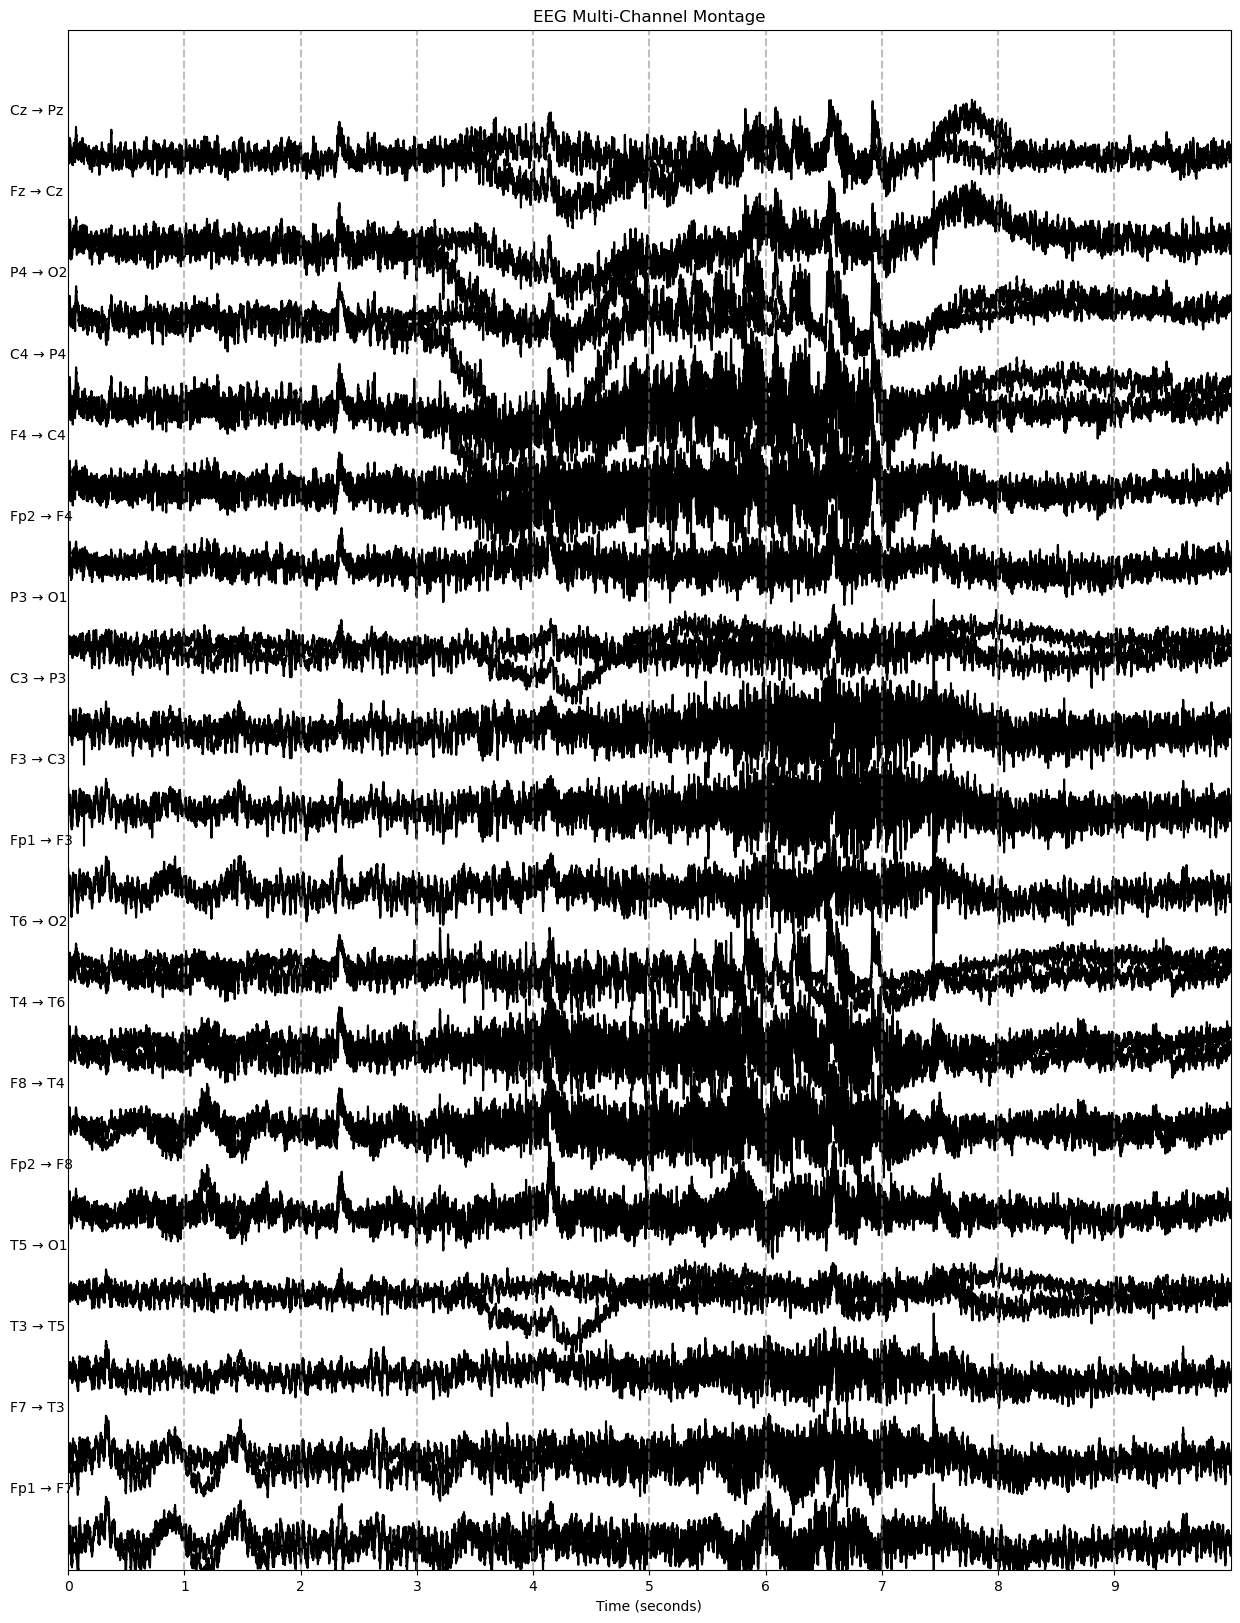

In [81]:
plot_eeg_montage(sample_eeg_data, time , scale = 100)